In [1236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline  

In [1237]:
##Women and children first?
##1. Describe each attribute, both with basic statistics and plots. State clearly your assumptions and discuss your findings.
##2. Use the `groupby` method to calculate the proportion of passengers that survived by sex.
##3. Calculate the same proportion, but by class and sex.
##4. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

Loading the data from excel file using pandas .read_excel() function

In [1238]:
titanic=pd.read_excel('Data/titanic.xls')

In [1239]:
#quick way to look at how many rows and columns
titanic.shape

(1309, 14)

The output above shows that the data has 1309 rows(observation) and 14 columns(attribute).

In [1240]:
#looking at the the names and the type of the attributes 
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

From the output above we see that some attributes with type of int and others with float and object.

In [1241]:
#quick look at the first rows to make sure that everything is aloright.
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


###### 1.Describe each attribute, both with basic statistics and plots. State clearly your assumptions and discuss your findings.
Solution:

First, we want to have a quick look at the summery of the numarical values

In [1242]:
#summry of the data
titanic.describe()

/Users/Ray/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,3.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
75%,3.000000,1.000000,NaN,1.000000,0.000000,NaN,NaN
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


From the initial resutls we got above, we can see for each numerical attribute some basic statistics such as count, mean, std, max and so on we clearly see there are some missing values from the age, fare, and body columns. we will deal with them later in this notebook!

And also we can have a quick look at the summery of the categorical values as well.

In [1243]:
categorical = titanic.dtypes[titanic.dtypes == "object"].index
titanic[categorical].describe()

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,939,186,3,28,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


From the resutls above, we notice that there might be some duplicates in the data since we got 1307 unique names out of the 1309 or it might be that some passengers have the same name, we will see! 

In [1244]:
#name attribute
#quick way to see how do the names look like
sorted(titanic["name"].head(10))

['Allen, Miss. Elisabeth Walton',
 'Allison, Master. Hudson Trevor',
 'Allison, Miss. Helen Loraine',
 'Allison, Mr. Hudson Joshua Creighton',
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
 'Anderson, Mr. Harry',
 'Andrews, Miss. Kornelia Theodosia',
 'Andrews, Mr. Thomas Jr',
 'Appleton, Mrs. Edward Dale (Charlotte Lamson)',
 'Artagaveytia, Mr. Ramon']

In [1245]:
titanic["name"].describe()


count                     1309
unique                    1307
top       Connolly, Miss. Kate
freq                         2
Name: name, dtype: object

Now we want to verify if we have a duplicates or people having similar names!


So, let's find those rows with the same values in the name column

In [1246]:
#here we try to find the rows with the same value in the name column
#create a list of the exact names that appears more than once
common_names=titanic.set_index('name').index.get_duplicates()

In [1247]:
#have a quick look to those rows 
titanic.loc[titanic['name'].isin(common_names)]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3,1,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3,0,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3,0,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


From the results above, we can confirm that we have no duplicates on the dataset based on name, the reseon is that those people share similar names but with different ages, this is the case for (Connolly, Miss. Kate and Kelly, Mr. James)  and aslo two persons with the exact same name (Connolly, Miss. Kate) one of them survived and the other didn't. 

So this confirms the assumption that we have different passengers with the same exact name. 

In [1248]:
#age attribute, lets have a look
titanic["age"].describe()

/Users/Ray/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%              NaN
50%              NaN
75%              NaN
max        80.000000
Name: age, dtype: float64

*Above basic results show that there are some missing values!!

let's find out what rows has a missing age value..

In [1249]:
titanic[titanic["age"].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
69,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,6,NaN,"St Leonards-on-Sea, England Ohio"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
74,1,0,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,NaN,NaN,"Stoughton, MA"
80,1,0,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S,NaN,NaN,"Roachdale, IN"
106,1,0,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,NaN,NaN,NaN


In [1250]:
#check how many rows or observations have a missing age
titanic["age"].isnull().sum()

263

we have 263 obsevations with missing ages, we have to find a solution for that..

- one solution is to drop all rows with ages with NaN value! but 263 is a lot, we will probably lose some information, 263 is approximatly 20% of the whole dataset so it might not be a good idea.

- or we can fill these missing values with 0s! But since it is age it doesn't make a lot of sense to fill these values with 0s.

- or find the a value in the middle and use it to fill in these missing values.

- or try to predict the missing ages using a machine learning algorithm..

Let's see the age distribution first!


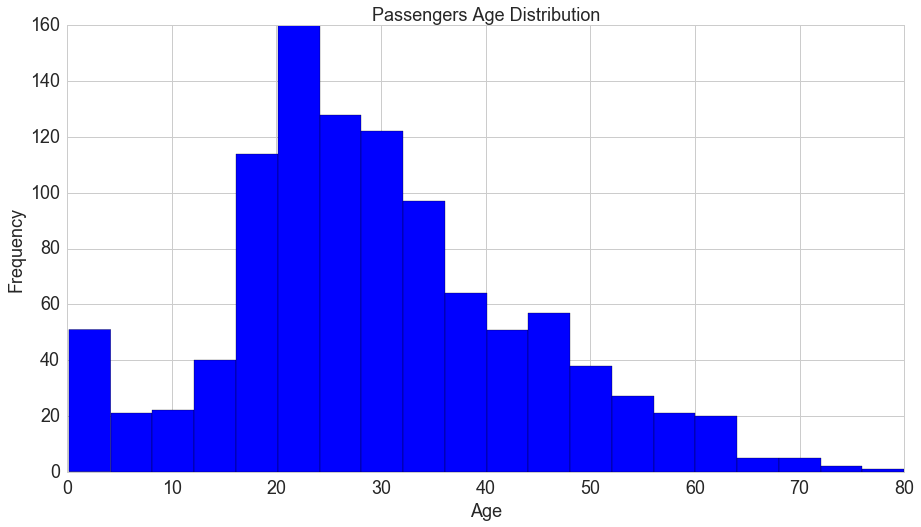

In [1251]:
titanic.hist(column='age', figsize=(15,8), bins=20, color = 'blue') 
plt.title('Passengers Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)




From the histogram above, we see that ages between 20 and 30 are the most common ages, so filling in the missing values with a central number like the median is not a very bad idea. 
Let's fill in the missing values with the median. 

In [1252]:
#caluculate the median of the age attribute
titanic["age"].median()

28.0

In [1253]:
#Replacing NaN values with the median value 28..  
median_age = np.where(titanic["age"].isnull(), 28, titanic["age"])    
titanic["age"] = median_age
titanic["age"].describe()

count    1309.000000
mean       29.503183
std        12.905246
min         0.166700
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

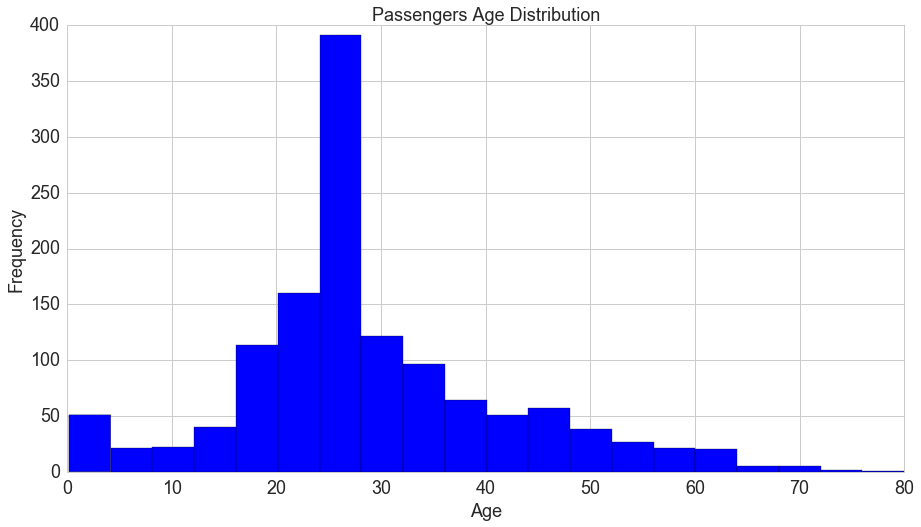

In [1254]:
# now let's see the new age distribution
titanic.hist(column='age', figsize=(15,8), bins=20, color = 'blue')  
plt.title('Passengers Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)



Not very bad! for the purpose of this homework we believe that this is fine.. However, when work with a real model we can test and see the effect of such a decision and then adjuct accordingly! 

In [1255]:
#fare attribute
titanic["fare"].describe()

/Users/Ray/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max       512.329200
Name: fare, dtype: float64

*Above basic results show that there are some missing values!!

let's find out what rows has a missing fare value..

In [1256]:
#check how many observation has a missing fare
titanic["fare"].isnull().sum()


1

In [1257]:
#let's find out which row
titanic[titanic.fare.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


This is the only passenger with missing fare value, and interstingly by looking up his name online at https://www.encyclopedia-titanica.org/titanic-victim/thomas-storey.html we find that his job was a Seaman so it makes sence to assume that this guy has 0 fare and based on this assumption we will fill the missing fare value with zaro.



In [1258]:
#Since Mr. Thomas is the only one with NaN fare value we will do the following 
new_fare = np.where(titanic["fare"].isnull(), 0, titanic["fare"])    
titanic["fare"] = new_fare
titanic["fare"].describe()

count    1309.000000
mean       33.270043
std        51.747063
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

Another thing that we noticed from the basic statistics above is that there are some people with values of zaro in the fare attribute. 


In [1259]:
titanic[titanic['fare']==0].shape

(18, 14)

In [1260]:
titanic[titanic['fare']==0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,28.0,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
125,1,0,"Fry, Mr. Richard",male,28.0,0,0,112058,0.0,B102,S,NaN,NaN,NaN
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,110.0,NaN
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool
223,1,0,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,NaN,S,NaN,NaN,Belfast
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands"
363,2,0,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
384,2,0,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,NaN,S,NaN,NaN,Belfast
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,NaN,S,NaN,NaN,Belfast


By looking at some of them online, intrestingly we found that some of them were seamen and others Fitter workin on the ship. and others like "Reuchlin, Jonkheer. John George" and intrestingly, by looking at https://www.encyclopedia-titanica.org/titanic-victim/johan-george-reuchlin.html we find that "John George" was holding a complementary tickets because of his position with the Holland America Line so it explains why there is a zero in the vlaue of the fare attribute.
so it makes since that the fare is 0.


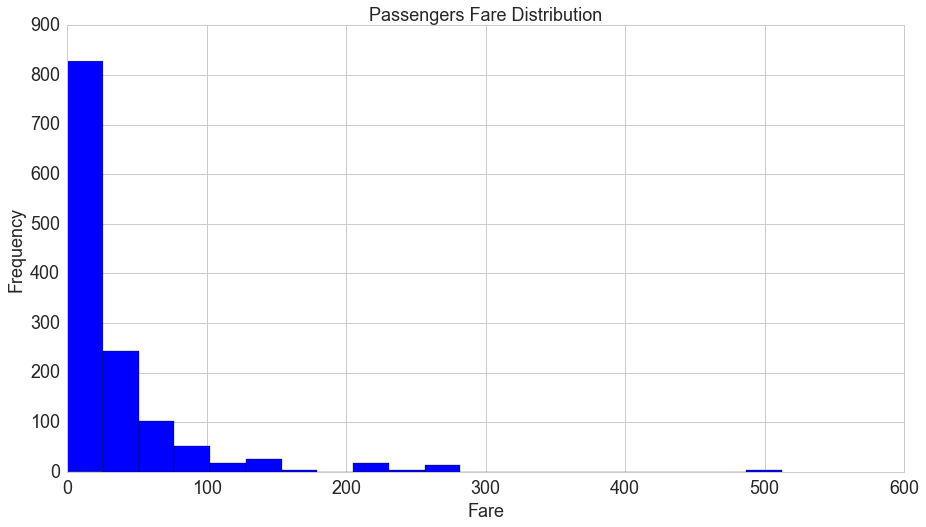

In [1261]:
#looking at the fare distribution
titanic.hist(column='fare', figsize=(15,8), bins= 20, color = 'blue')
plt.title('Passengers Fare Distribution', fontsize=18)
plt.xlabel('Fare', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

we can clearly see that, the majority of the passengers paid an amount between 0-50.. and also we found that there were some outliers who paid way more then that.. 

We use boxplot to have a better look at thoso outliers..

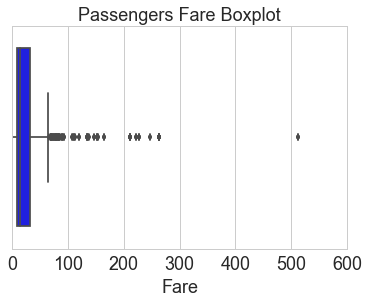

In [1262]:
#boxplot - fare..
sns.set_style("whitegrid")
sns.boxplot(titanic.fare, color = 'blue')
plt.rcParams['figure.figsize']=10,5
plt.title('Passengers Fare Boxplot', fontsize=18)
plt.xlabel('Fare', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

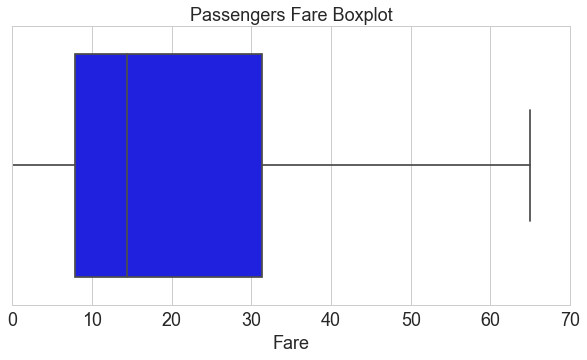

In [1263]:
#boxplot without outliers..
sns.boxplot(titanic.fare, showfliers=False, color = 'blue')
plt.rcParams['figure.figsize']=10,5
plt.title('Passengers Fare Boxplot', fontsize=18)
plt.xlabel('Fare', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

In [1264]:
#show the passenger who paid more than
titanic[titanic['fare']>300]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


Looking at "Mr Thomas Drake Martinez Cardeza" online, we found that he and his mother They occupied one of the two most luxurious suites on board.. 
https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html


In [1265]:
#survived attribute 
titanic.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [1266]:
#making sure no missing data 
titanic[titanic.survived.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


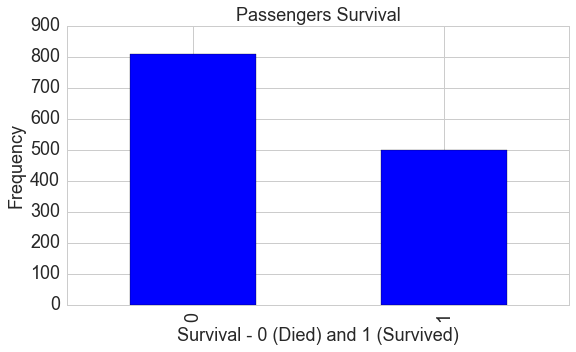

In [1267]:
#plot survived
titanic.survived.value_counts().plot(kind='bar',color = 'blue',figsize=(9,5))
plt.title('Passengers Survival', fontsize=18)
plt.xlabel('Survival - 0 (Died) and 1 (Survived)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


In [1268]:
#persentage of passengers that have survived and who have not..
titanic.survived.value_counts()/titanic.survived.count()*100

0    61.802903
1    38.197097
Name: survived, dtype: float64

~62% died and ~ 38% survived --- More passengers died than survived!

In [1269]:
#sex attribute 
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

In [1270]:
#making sure no missing data 
titanic[titanic.sex.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


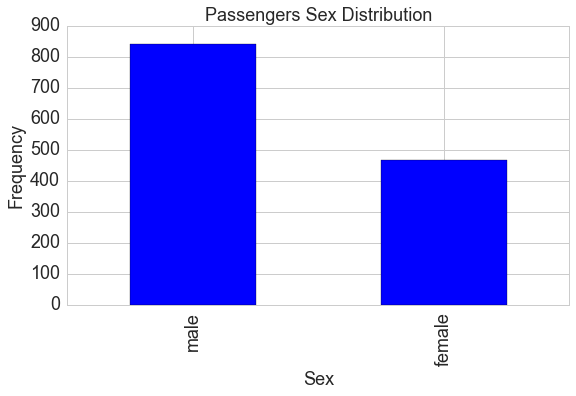

In [1271]:
titanic.sex.value_counts().plot(kind='bar',color = 'blue',figsize=(9,5))
plt.title('Passengers Sex Distribution', fontsize=18)
plt.xlabel('Sex', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


In [1272]:
#persentage of females and males..
titanic.sex.value_counts()/titanic.sex.count()*100

male      64.400306
female    35.599694
Name: sex, dtype: float64

~64% males and ~36% females --- male passengers are more than female passengers

In [1273]:
#pclass attribute 
titanic.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [1274]:
#making sure no missing data 
titanic[titanic.pclass.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


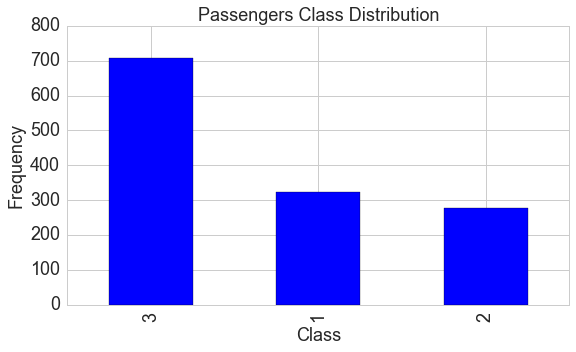

In [1275]:
titanic.pclass.value_counts().plot(kind='bar', color = 'blue',figsize=(9,5))
plt.title('Passengers Class Distribution', fontsize=18)
plt.xlabel('Class', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


In [1276]:
#persentage of each class..
titanic.pclass.value_counts()/titanic.pclass.count()*100

3    54.163484
1    24.675325
2    21.161192
Name: pclass, dtype: float64

class1 -> ~25% .. class2 -> 21% .. class3 -> 54%

The majority of the passengers are traveling on the 3rd class.. we can assume that most of the passengers have a limited budget, maybe!

In [1277]:
#home.dest attribute 

In [1278]:
titanic['home.dest'].describe()


count              745
unique             369
top       New York, NY
freq                64
Name: home.dest, dtype: object

In [1279]:
#check missing data 
titanic[titanic['home.dest'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,NaN,NaN
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN
24,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
28,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,8,NaN,NaN
44,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C,3,NaN,NaN
46,1,0,"Cairns, Mr. Alexander",male,28.0,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
66,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C,4,NaN,NaN
73,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S,11,NaN,NaN
88,1,1,"Daniels, Miss. Sarah",female,33.0,0,0,113781,151.5500,NaN,S,8,NaN,NaN


564 rows with no home.dest values!

In [1280]:
#check the most common values for home.dest attribute
#assuming the format of (Home/Destination)
titanic['home.dest'].value_counts()

New York, NY                                      64
London                                            14
Montreal, PQ                                      10
Cornwall / Akron, OH                               9
Paris, France                                      9
Winnipeg, MB                                       8
Wiltshire, England Niagara Falls, NY               8
Philadelphia, PA                                   8
Belfast                                            7
Sweden Winnipeg, MN                                7
Brooklyn, NY                                       7
Sweden Worcester, MA                               5
Rotherfield, Sussex, England Essex Co, MA          5
Bulgaria Chicago, IL                               5
Haverford, PA / Cooperstown, NY                    5
Somerset / Bernardsville, NJ                       5
Ottawa, ON                                         5
Paris / Montreal, PQ                               4
Montreal, PQ / Chesterville, ON               

The result above shows that, the most common value for this column is "New York, NY" with 64 occurrences and the second top is "london", and so on.. its clear that New York, NY is a destination however using only this dataset it's hard to tell about the rest.. but the result above gives some idea..

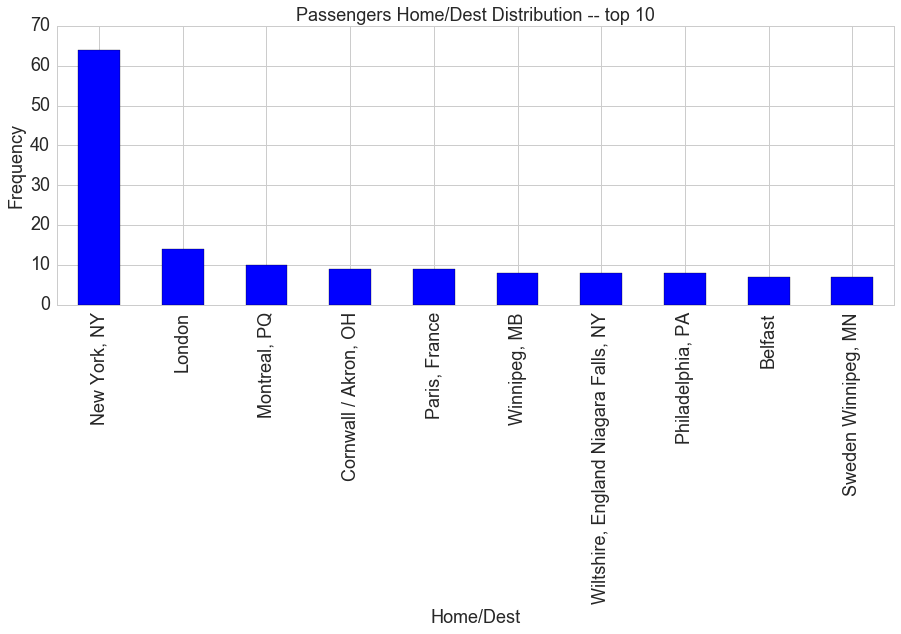

In [1281]:
#plot of the top 10 most frequent value of home/dest
titanic['home.dest'].value_counts().head(10).plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Passengers Home/Dest Distribution -- top 10', fontsize=18)
plt.xlabel('Home/Dest', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)


In [1282]:
#sibsp attribute 
titanic['sibsp'].describe()


count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64

In [1283]:
#check missing data 

titanic[titanic.sibsp.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


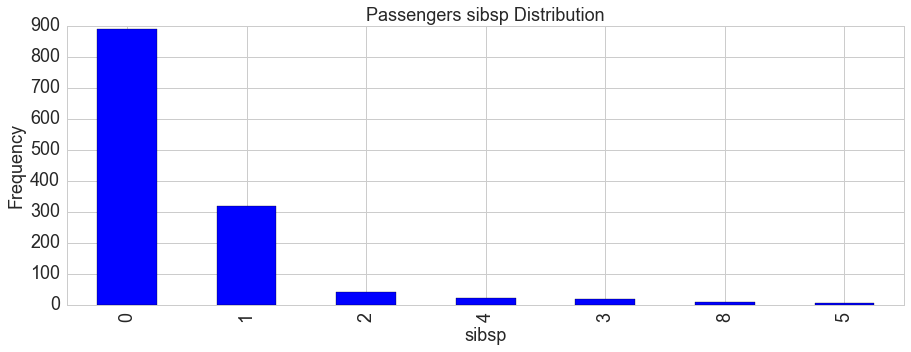

In [1284]:
titanic.sibsp.value_counts().plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Passengers sibsp Distribution', fontsize=18)
plt.xlabel('sibsp', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

In [1285]:
titanic.sibsp.value_counts()/titanic.sibsp.count()*100

0    68.067227
1    24.369748
2     3.208556
4     1.680672
3     1.527884
8     0.687548
5     0.458365
Name: sibsp, dtype: float64

The result above shows that ~68% of the passengers traveled on the ship without any siblings or spouse.. and ~24% traveled on the ship with only one sibling or spouse. and only ~3% of them was on the ship with 2 siblings or spouse. 
the other persentage of the freqs of sib/spouse can be seen above.

In [1130]:
#parch attribute 
titanic['parch'].describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: parch, dtype: float64

In [1131]:
#check missing data 
titanic[titanic.parch.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


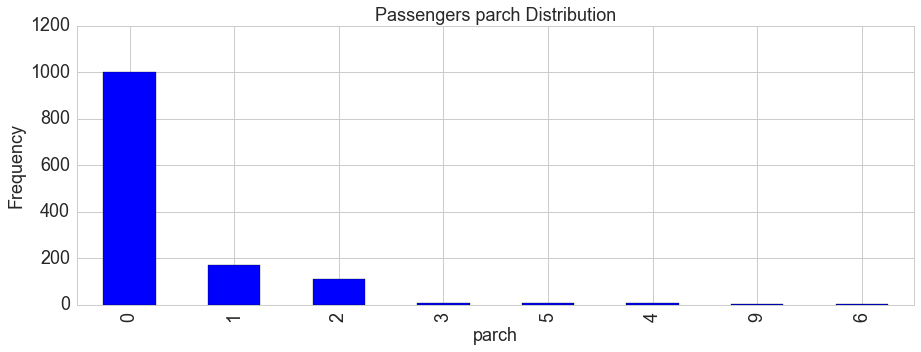

In [1132]:
titanic.parch.value_counts().plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Passengers parch Distribution', fontsize=18)
plt.xlabel('parch', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
#check whar parch is..

In [1133]:
titanic.parch.value_counts()/titanic.parch.count()*100

0    76.546982
1    12.987013
2     8.632544
3     0.611154
5     0.458365
4     0.458365
9     0.152788
6     0.152788
Name: parch, dtype: float64

The result above shows that ~76% of the passengers traveled on the ship without any parents or children.. and ~12% traveled on the ship with only one parent or a child. and only ~8% of them was on the ship with 2 parents or children. 
the other persentage of the freq of parent/child is above.

The results from analysing the parch and sibsp suggest that the majority of the passengers traveled alone!

In [1134]:
#cabin attribute 
titanic['cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object

In [1135]:
#check missing values
titanic[titanic.cabin.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN
15,1,0,"Baumann, Mr. John D",male,28.0,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN
25,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,NaN,148.0,"San Francisco, CA"
35,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,4,NaN,"Cooperstown, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,28.0,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,28.0,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,28.0,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
48,1,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0,PC 17606,27.4458,NaN,C,6,NaN,"Washington, DC"


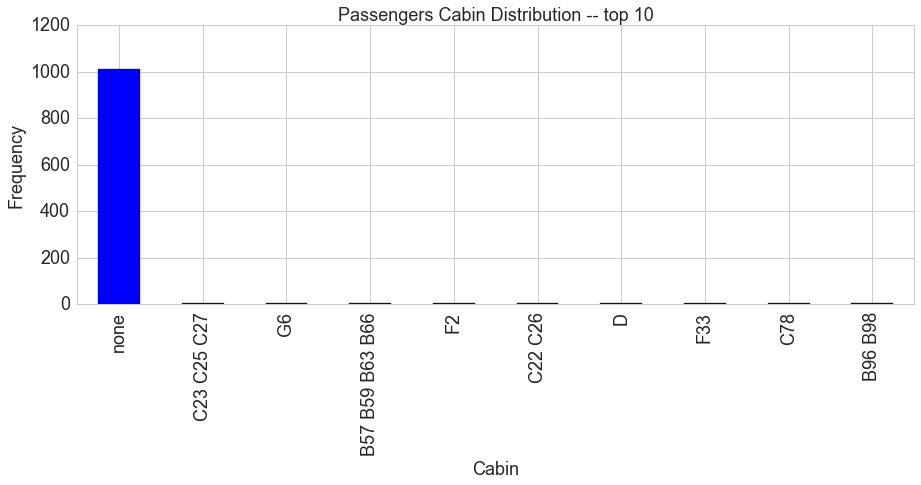

In [1213]:
titanic['cabin'].value_counts().head(10).plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Passengers Cabin Distribution -- top 10', fontsize=18)
plt.xlabel('Cabin', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

The result above shows that there are 1014 passenger with missing cabin code.

It might be the case that most passengers did not stay in a cabin.


so to fill in these missing falue we will go with the assumption that passengers with NaN value in the cabon attribute are those with no cabin and we will put a value of 'none' instead. This is our assumption and might not be the best correct fix for this!



In [1140]:
new_cabin = np.where(titanic["cabin"].isnull(), "none", titanic["cabin"])    
titanic["cabin"] = new_cabin
titanic["cabin"].describe()

count     1309
unique     187
top       none
freq      1014
Name: cabin, dtype: object

In [1141]:
#looking at the top 10 values 
titanic['cabin'].value_counts().head(10)

none               1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
F2                    4
C22 C26               4
D                     4
F33                   4
C78                   4
B96 B98               4
Name: cabin, dtype: int64

In [1142]:
#embarked attribute
titanic['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [1143]:
#check missing values 
titanic[titanic.embarked.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


One assumption way to quickly fix the missing value problem is to look at the distribution of the embaraked values.. and find the most comon value and assign it to the rows with missing values.. for example we could assign "S" to both passengers from the plot below! 

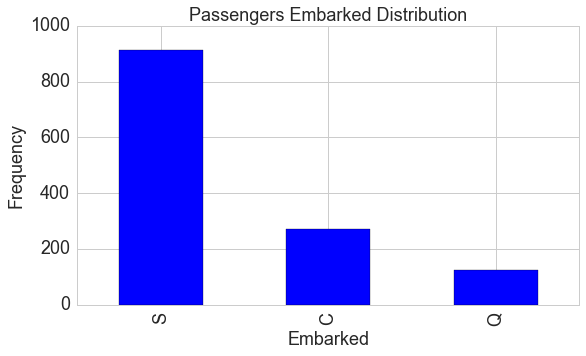

In [1214]:
titanic.embarked.value_counts().plot(kind='bar', color = 'blue',figsize=(9,5))
plt.title('Passengers Embarked Distribution', fontsize=18)
plt.xlabel('Embarked', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

However, by looking at the name of "Icard, Miss. Amelie" and "Stone, Mrs. George Nelson (Martha Evelyn)" online we interstingly find that they both boarded on the same ticket number and embarked from Southampton Southampton "Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28." 

So based on that we will replace the missing value with S => Southampton. 

In [988]:
new_embarked = np.where(titanic["embarked"].isnull(), "S", titanic["embarked"])    
titanic["embarked"] = new_embarked
titanic["embarked"].describe()

count     1309
unique       3
top          S
freq       916
Name: embarked, dtype: object

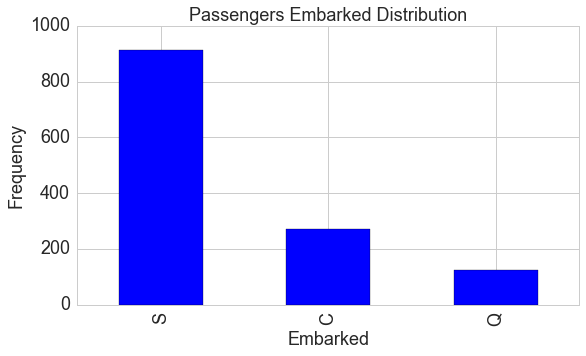

In [1147]:
titanic.embarked.value_counts().plot(kind='bar', color = 'blue',figsize=(9,5))
plt.title('Passengers Embarked Distribution', fontsize=18)
plt.xlabel('Embarked', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

In [1148]:
titanic.embarked.value_counts()/titanic.embarked.count()*100

S    69.931140
C    20.657995
Q     9.410865
Name: embarked, dtype: float64

The result above shows that ~70% of the passengers embarked from "S".. and ~20% embarked from "C".. and ~9% embarked from "Q"  

In [1149]:
#make sure that we assigned the correct values
titanic[titanic['name']=='Icard, Miss. Amelie']


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN


In [1150]:
titanic[titanic['name']=='Stone, Mrs. George Nelson (Martha Evelyn)']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


Perfect!

In [1151]:
#boat attribute 
titanic['boat'].describe()


count     486
unique     28
top        13
freq       39
Name: boat, dtype: object

In [1152]:
#checking missing data
titanic[titanic.boat.isnull()]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,none,C,NaN,22.0,"Montevideo, Uruguay"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
15,1,0,"Baumann, Mr. John D",male,28.0,0,0,PC 17318,25.9250,none,S,NaN,NaN,"New York, NY"
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ"
25,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,none,C,NaN,148.0,"San Francisco, CA"
30,1,0,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S,NaN,NaN,"Trenton, NJ"


we have 823 rows with missing boat values

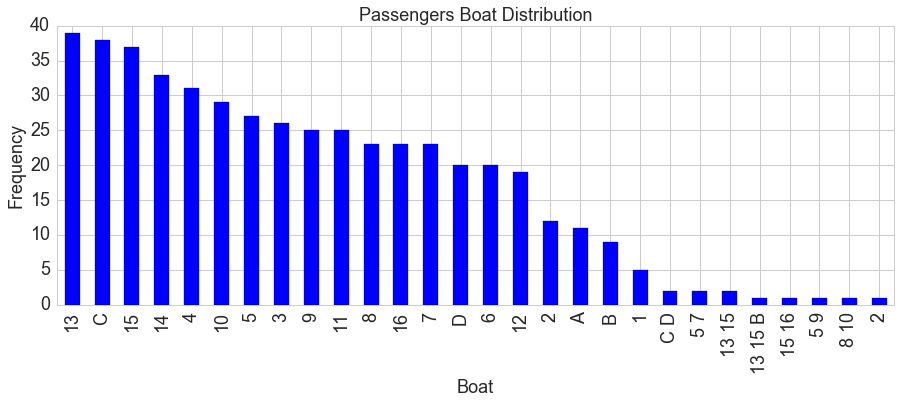

In [1215]:
titanic['boat'].value_counts().plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Passengers Boat Distribution', fontsize=18)
plt.xlabel('Boat', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

Boats can have number such as 13, letter such as C, or both such as 1315B 

In [1154]:
#top 5 most frequent boats
titanic.boat.value_counts().head(5)

13    39
C     38
15    37
14    33
4     31
Name: boat, dtype: int64

In [1155]:
#top 5 most frequent boats (persentage)
titanic.boat.value_counts().head(5)/titanic.boat.count()*100

13    8.024691
C     7.818930
15    7.613169
14    6.790123
4     6.378601
Name: boat, dtype: float64

In [1156]:
#body attribute 
titanic['body'].describe()


/Users/Ray/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    121.000000
mean     160.809917
std       97.696922
min        1.000000
25%             NaN
50%             NaN
75%             NaN
max      328.000000
Name: body, dtype: float64

In [1157]:
#checking missing data
titanic[titanic.body.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"


In [1158]:
titanic['body'].value_counts().head(10)

328.0    1
153.0    1
75.0     1
79.0     1
80.0     1
81.0     1
89.0     1
96.0     1
97.0     1
98.0     1
Name: body, dtype: int64

we have 1188 rows missing the body value

In [1159]:
#ticket attribute 
titanic['ticket'].describe()

count         1309
unique         939
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [1160]:
#checking missing data
titanic[titanic.ticket.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [1161]:
#top 10 most frequent Tickets
titanic['ticket'].value_counts().head(10)

CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
PC 17608         7
347082           7
347077           7
3101295          7
113781           6
19950            6
Name: ticket, dtype: int64

Our assumption here is that more than one passenger shared the same ticket number!

###### 2. Use the `groupby` method to calculate the proportion of passengers that survived by sex.

Solution:


In [1162]:
sex_grouped=titanic.groupby('sex')
sex_grouped.describe()

/Users/Ray/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


age        body        fare       parch      pclass  \
sex                                                                        
female count  466.000000    8.000000  466.000000  466.000000  466.000000   
       mean    28.572067  166.625000   46.198097    0.633047    2.154506   
       std     13.300806  138.110657   63.292599    1.049579    0.866181   
       min      0.166700    7.000000    6.750000    0.000000    1.000000   
       25%     21.000000         NaN   10.504175    0.000000    1.000000   
       50%     28.000000         NaN   23.000000    0.000000    2.000000   
       75%     35.000000         NaN   55.331275    1.000000    3.000000   
       max     76.000000  328.000000  512.329200    9.000000    3.000000   
male   count  843.000000  113.000000  843.000000  843.000000  843.000000   
       mean    30.017892  160.398230   26.123575    0.247924    2.372479   
       std     12.659913   95.035289   42.471194    0.708938    0.811908   
       min      0.333300    1.000000    0.000000    0.000000    1.000000   
       25%     24.000000         NaN    7.864600    0.000000    2.000000   
       50%     28.000000         NaN   11.500000    0.000000    3.000000   
       75%     35.000000         NaN   26.550000    0.000000    3.000000   
       max     80.000000  322.000000  512.329200    9.000000    3.000000   

                   sibsp    survived  
sex                                   
female count  466.000000  466.000000  
       mean     0.652361    0.727468  
       std      1.101009    0.445741  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000  
male   count  843.000000  843.000000  
       mean     0.413998    0.190985  
       std      0.997928    0.393310  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    0.000000  
       max      8.000000    1.000000

In [1163]:
a =sex_grouped.survived.sum()
a

sex
female    339
male      161
Name: survived, dtype: int64

In [1164]:
#males proportion survived
df_male = titanic.survived[titanic.sex == 'male'].value_counts()
a.male/df_male.sum()*100
#a.male/(a.male+a.female)

19.098457888493474

In [1165]:
#female proportion survived
df_female = titanic.survived[titanic.sex == 'female'].value_counts()
a.female/df_female.sum()*100
#f.male/(a.male+a.female)

72.746781115879827

In [1166]:
b=titanic.sex.value_counts()

In [1167]:
c=a/b

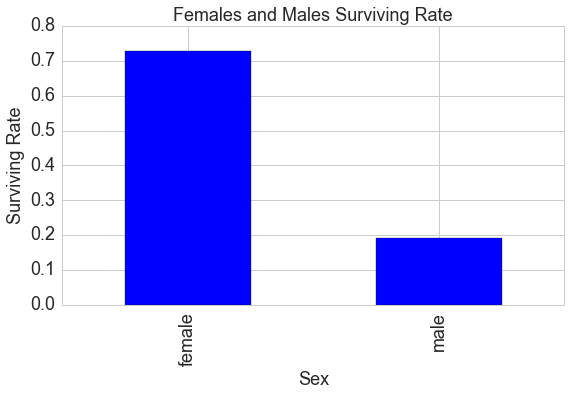

In [1168]:
c.plot(kind = 'bar', color = 'blue', figsize=(9,5))
plt.title('Females and Males Surviving Rate', fontsize=18)
plt.xlabel('Sex', fontsize=18)
plt.ylabel('Surviving Rate', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

The above result shows that 19.09% of males survived, and 72.74% of females survived and wecan clearly see that females had a very high servival rate in comparison with males.

###### 3. Calculate the same proportion, but by class and sex.

Solution:

In [1169]:
group = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived)

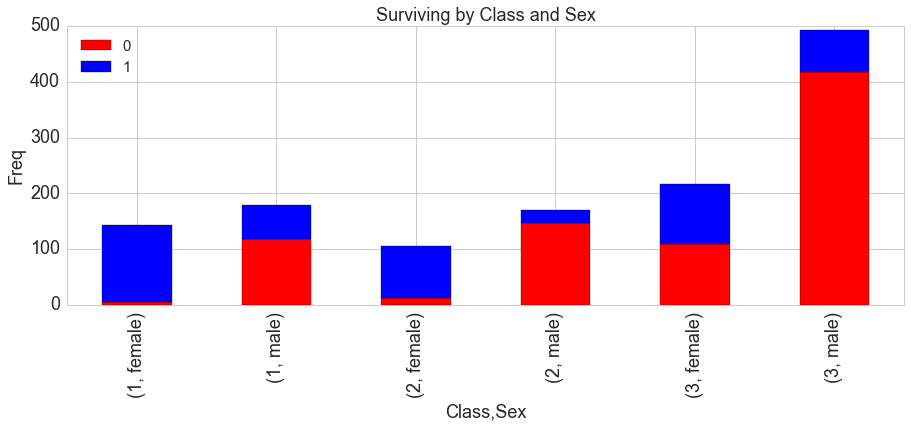

In [1194]:
group.plot(kind = 'bar', stacked = True, color = ['red', 'blue'],figsize=(15,5))
plt.title('Surviving by Class and Sex', fontsize=18)
plt.xlabel('Class,Sex', fontsize=18)
plt.ylabel('Freq', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(loc=2,prop={'size':15})

In [1174]:
group

survived         0    1
pclass sex             
1      female    5  139
       male    118   61
2      female   12   94
       male    146   25
3      female  110  106
       male    418   75

In [1175]:
# Here we want to flatten the dataframe above in order to make the proportion calculation easy for us!
flatten_1=group.reset_index()

In [1176]:
#adding a new column => # of survived + # of died 
flatten_1['sum']=flatten_1[0]+flatten_1[1]

In [1177]:
# adding a new column => for the proportion
flatten_1['proportion_of_passengers_surviving']=flatten_1[1]/flatten_1['sum']*100

In [1178]:
flatten_1

survived,pclass,sex,0,1,sum,proportion_of_passengers_surviving
0,1,female,5,139,144,96.527778
1,1,male,118,61,179,34.078212
2,2,female,12,94,106,88.679245
3,2,male,146,25,171,14.619883
4,3,female,110,106,216,49.074074
5,3,male,418,75,493,15.212982


From the results above, the proportion of passennger survived by class and sex is:
- Class1 
  - Males   34.07%
  - Females 96.52%
- Class2 
  - Males   14.61%  
  - Females 88.67%
- Class3 
  - Males   15.21%
  - Females 49.07%
 


###### 4. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.


Solution:

In [1179]:
#possible solution is to define a new column and name it age_category and assign passengers to different categories based on their age 
titanic['age_category'] = ''
titanic['age_category'][titanic['age'] < 14] = 'children'
titanic['age_category'][(titanic['age'] >= 14) & (titanic['age'] <= 20)] = 'adolescents'
titanic['age_category'][(titanic['age'] > 20) & (titanic['age'] <= 64)] = 'adult'
titanic['age_category'][titanic['age'] > 64] = 'senior'

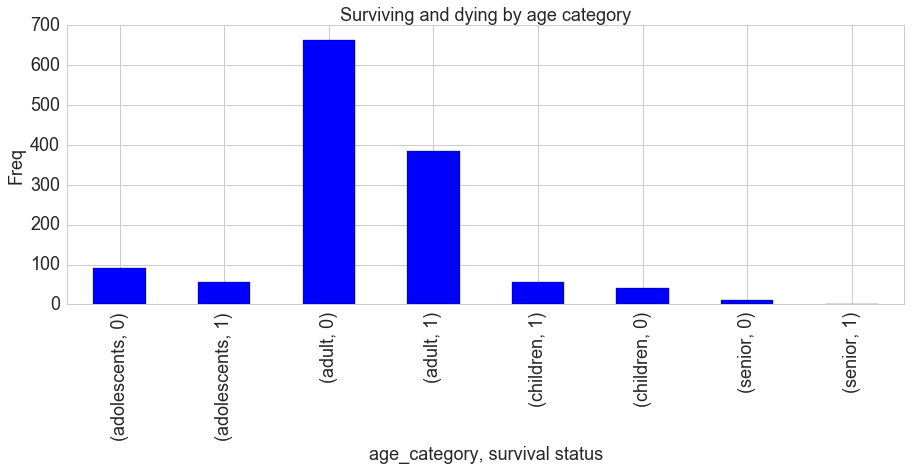

In [1216]:
# quick look at the number of passengers that survived or died within each category
g =titanic.groupby('age_category').survived.sum()
g =titanic.groupby('age_category').survived.value_counts()
g.plot(kind='bar', color = 'blue',figsize=(15,5))
plt.title('Surviving and dying by age category', fontsize=18)
plt.xlabel('age_category, survival status', fontsize=18)
plt.ylabel('Freq', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

In [1184]:
# Here we want to calculate survival proportions by age category, class and sex.
group_4 = pd.crosstab([titanic.pclass, titanic.sex, titanic.age_category ], titanic.survived)

In [1185]:
group_4

survived                      0    1
pclass sex    age_category          
1      female adolescents     0   15
              adult           4  123
              children        1    0
              senior          0    1
       male   adolescents     4    1
              adult         108   54
              children        0    5
              senior          6    1
2      female adolescents     1   12
              adult          11   68
              children        0   14
       male   adolescents    15    2
              adult         129   12
              children        0   11
              senior          2    0
3      female adolescents    16   19
              adult          78   72
              children       16   15
       male   adolescents    56    8
              adult         334   55
              children       25   12
              senior          3    0

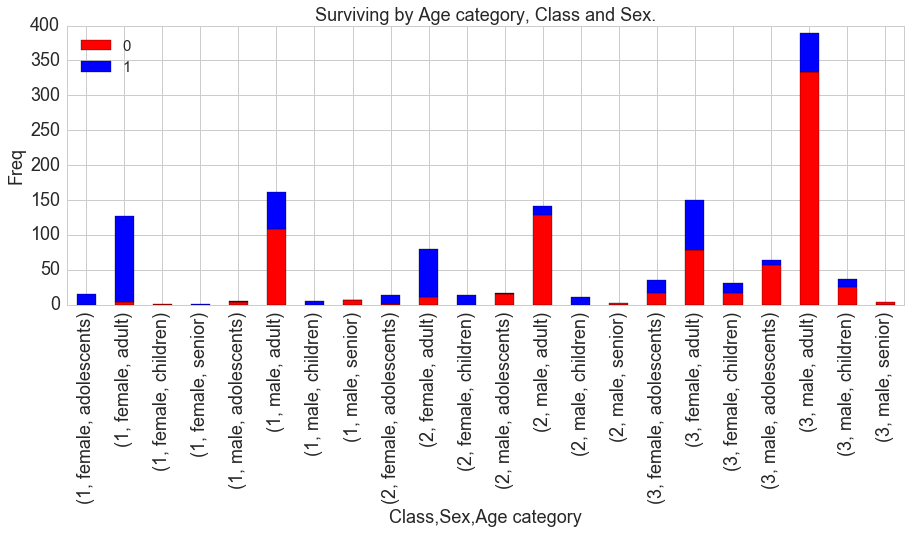

In [1195]:
# look at what the survival numbers at a deep level! broken down by class, sex, and age_category!
group_4.plot(kind = 'bar', stacked = True, color = ['red', 'blue'],figsize=(15,5))
plt.title('Surviving by Age category, Class and Sex.', fontsize=18)
plt.xlabel('Class,Sex,Age category', fontsize=18)
plt.ylabel('Freq', fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(loc=2,prop={'size':15})



In [1196]:
# Here we want to flatten the dataframe above in order to make the proportion calculation easy for us!
flatten=group_4.reset_index()

In [1197]:
#adding a new column => # of survived + # of died 
flatten['sum']=flatten[0]+flatten[1]

In [1198]:
# adding a new column => for the proportion
flatten['proportion_of_passengers_surviving']=flatten[1]/flatten['sum']*100

In [1199]:
flatten

survived,pclass,sex,age_category,0,1,sum,proportion_of_passengers_surviving
0,1,female,adolescents,0,15,15,100.000000
1,1,female,adult,4,123,127,96.850394
2,1,female,children,1,0,1,0.000000
3,1,female,senior,0,1,1,100.000000
4,1,male,adolescents,4,1,5,20.000000
5,1,male,adult,108,54,162,33.333333
6,1,male,children,0,5,5,100.000000
7,1,male,senior,6,1,7,14.285714
8,2,female,adolescents,1,12,13,92.307692
9,2,female,adult,11,68,79,86.075949


From the results above, the proportion of passennger survived by class, age group, and sex is:
- Class1 
  - Males
      - seniors 14.28%
      - adults  33.33%
      - adolescents 20%
      - childrens 100%
  - Females 
      - seniors  100%
      - adults  96.85%
      - adolescents 100%
      - childrens 0%
- Class2 
  - Males
      - seniors  0%
      - adults  8.51%
      - adolescents  11.76%
      - childrens   100%
  - Females 
      - seniors none
      - adults  86.07%
      - adolescents 92.30%
      - childrens 100%
- Class3 
  - Males
      - seniors 0%
      - adults 14.13%
      - adolescents 12.50%
      - childrens 32.43%
  - Females
      - seniors none
      - adults 48%
      - adolescents 54.28%
      - childrens 48.38%


From the results above we can clearly see the idea of "Women and childrens first!"
also we can see that the proportion of females and childerin survived in Class3, is not as high as the proportion of females and childerin survived in Class2.. maybe passengers in Class2 have higher priority when it comes to being rescued than passengers in Class3. same thing applies to passengers in Class1 .. having the highest priority when it comes to being rescued.

The End!